# Exploração inicial dos dados

First 5 rows:
   ID COUNTRY     LON      LAT  ANNUAL   JAN   FEB   MAR   APR   MAY   JUN  \
0   1  Brasil -53.549 -33.7005    4444  6603  5747  4999  3597  2536  2172   
1   2  Brasil -53.449 -33.7005    4446  6610  5735  4986  3588  2550  2167   
2   3  Brasil -53.349 -33.7005    4452  6630  5732  4989  3572  2563  2170   
3   4  Brasil -53.249 -33.7005    4468  6709  5820  5047  3575  2555  2151   
4   5  Brasil -53.549 -33.6005    4454  6658  5771  5014  3620  2546  2159   

    JUL   AUG   SEP   OCT   NOV   DEC  \
0  2292  2924  3784  5180  6453  7037   
1  2280  2926  3810  5199  6470  7036   
2  2279  2928  3820  5213  6465  7058   
3  2247  2904  3818  5219  6476  7090   
4  2271  2932  3797  5168  6443  7072   

                                            geometry  
0  POLYGON ((-53.59905 -33.75046, -53.59905 -33.6...  
1  POLYGON ((-53.49905 -33.75046, -53.49905 -33.6...  
2  POLYGON ((-53.39905 -33.75046, -53.39905 -33.6...  
3  POLYGON ((-53.29905 -33.75046, -53.29905 -33.6.

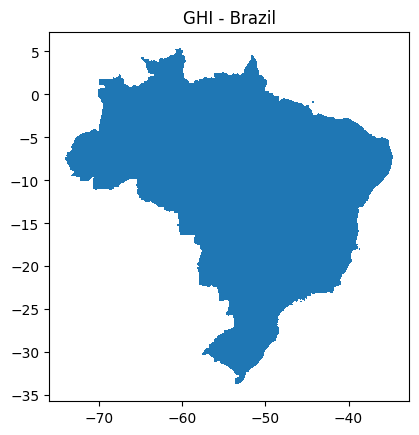

In [4]:
import geopandas as gpd
import matplotlib.pyplot as plt

file_path = "../data/raw/solar_irradiation/global_horizontal_means.shp"

try:
    gdf = gpd.read_file(file_path)

    print("First 5 rows:")
    print(gdf.head())

    print("\nColumns:")
    print(gdf.columns)

    print(f"\nCoordinate Reference System (CRS): {gdf.crs}")

    print("\nQuick plot for visualization:")
    gdf.plot()
    plt.title("GHI - Brazil")
    plt.show()

except FileNotFoundError:
    print(f"Error: The file was not found at the path '{file_path}'")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

In [5]:
gdf["ANNUAL"].describe()

count    72272.000000
mean      4911.835413
std        427.880628
min       3594.000000
25%       4565.000000
50%       4838.000000
75%       5194.000000
max       6120.000000
Name: ANNUAL, dtype: float64

Thermal map for Brazil:


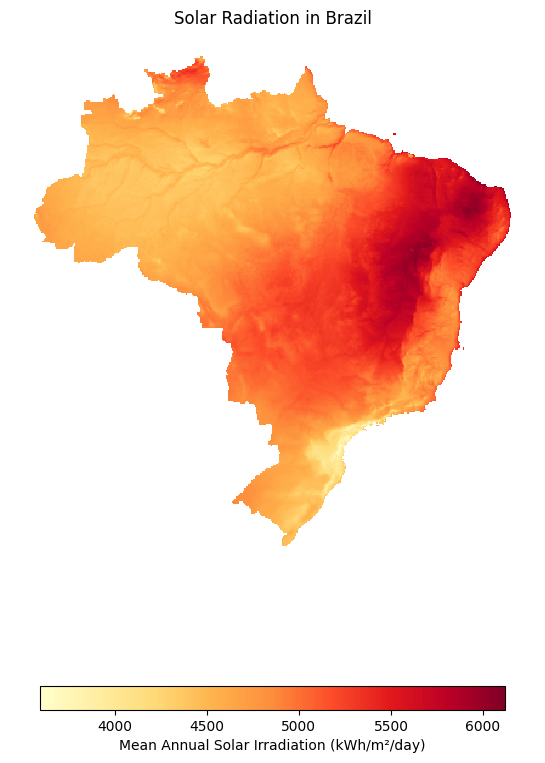

In [11]:
print("Thermal map for Brazil:")
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

gdf.plot(
    column="ANNUAL",
    ax=ax,
    legend=True,
    legend_kwds={
        "label": "Mean Annual Solar Irradiation (kWh/m²/day)",
        "orientation": "horizontal",
        "shrink": 0.6,
    },
    cmap="YlOrRd",
)
ax.set_title("Solar Radiation in Brazil")
ax.set_axis_off()
plt.show()

In [14]:
highest_irradiation = gdf.sort_values("ANNUAL", ascending=False).head(10)

print("Top 10 areas with highest mean annual solar irradiation:")
print(highest_irradiation[["ID", "ANNUAL", "LON", "LAT"]])

Top 10 areas with highest mean annual solar irradiation:
          ID  ANNUAL     LON      LAT
34862  34863    6120 -41.849  -9.8005
35229  35230    6094 -41.449  -9.7005
30902  30903    6091 -42.549 -11.0005
34863  34864    6090 -41.749  -9.8005
34494  34495    6089 -42.349  -9.9005
34857  34858    6073 -42.349  -9.8005
30307  30308    6072 -42.649 -11.2005
34861  34862    6072 -41.949  -9.8005
35228  35229    6068 -41.549  -9.7005
34864  34865    6062 -41.649  -9.8005


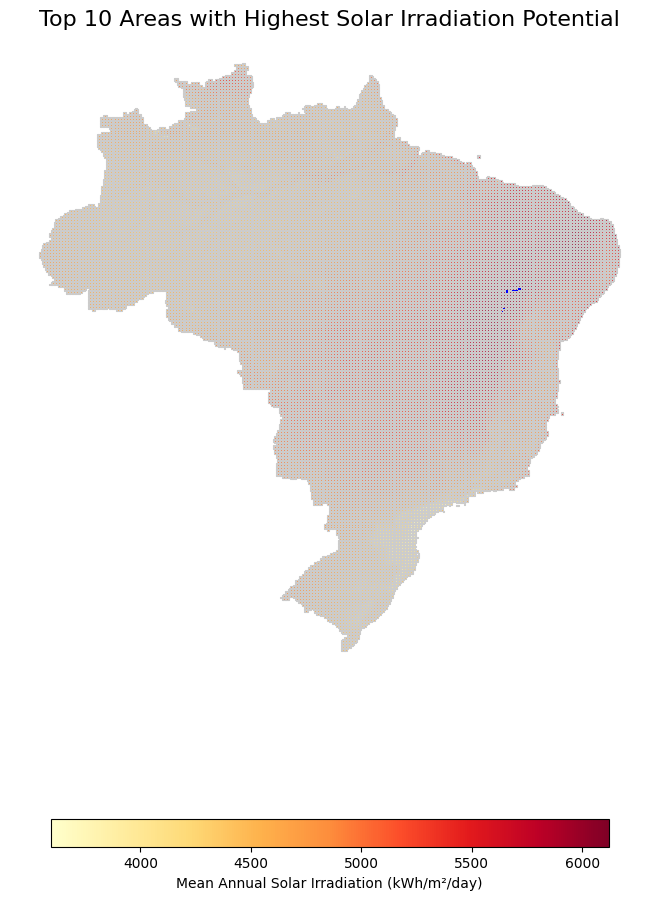

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

gdf.plot(
    column="ANNUAL",
    cmap="YlOrRd",
    linewidth=0.8,
    ax=ax,
    edgecolor="0.8",
    legend=True,
    legend_kwds={
        "label": "Mean Annual Solar Irradiation (kWh/m²/day)",
        "orientation": "horizontal",
        "shrink": 0.6,
    },
)

highest_irradiation.plot(ax=ax, marker="*", color="blue", markersize=150)

ax.set_axis_off()
ax.set_title(
    "Top 10 Areas with Highest Solar Irradiation Potential",
    fontdict={"fontsize": "16", "fontweight": "3"},
)

plt.show()

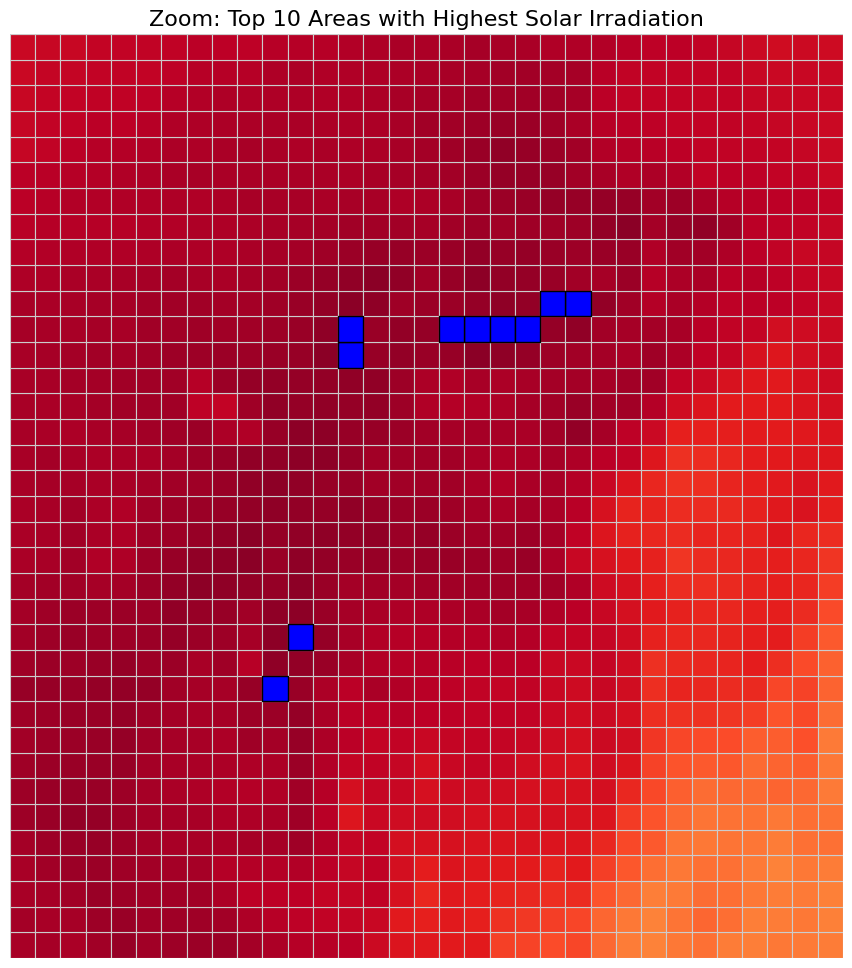

In [21]:
bounds = highest_irradiation.total_bounds

padding = 1
min_lon, min_lat, max_lon, max_lat = (
    bounds[0] - padding,
    bounds[1] - padding,
    bounds[2] + padding,
    bounds[3] + padding,
)

fig, ax = plt.subplots(1, 1, figsize=(12, 12))

gdf.plot(column="ANNUAL", cmap="YlOrRd", linewidth=0.8, ax=ax, edgecolor="0.8")

highest_irradiation.plot(
    ax=ax, marker="*", color="blue", markersize=200, edgecolor="black"
)
ax.set_xlim(min_lon, max_lon)
ax.set_ylim(min_lat, max_lat)

ax.set_axis_off()
ax.set_title(
    "Zoom: Top 10 Areas with Highest Solar Irradiation",
    fontdict={"fontsize": "16", "fontweight": "3"},
)

plt.show()